In [1]:
#importing all the required libraries
import time
import scipy.io
import numpy as np
import pandas as po
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
mat = scipy.io.loadmat('usps_all.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [4]:
# Dataset shapes
mat['data'].shape

(256, 1100, 10)

In [5]:
mat['data'][:, :, 0].shape

(256, 1100)

In [6]:
mat['data'].transpose(2, 1, 0).shape

(10, 1100, 256)

In [7]:
np.array([[i]*1100 for i in range(10)]).reshape(-1).shape

(11000,)

In [8]:
# In order to check how to do the splits of train and test set
np.vstack([mat['data'].transpose(2, 1, 0)[i, :600, :] for i in range(10)]).shape

(6000, 256)

- Divide the set of handwritten digits into two classes, 0s and rest(i.e not zero) <br>
- Divide both the classes into training set of 550 eamples of each digit and testing set of remaining digits<br>
- This way training set has 550 examples of zero and 4950 examples of Euclidean metric with fixed k=20<br>
  to verify global classification rate of your testing set

In [9]:
# Creating the training and testing set
X_train = np.vstack([mat['data'].transpose(2, 1, 0)[i, :550, :] for i in range(10)])
X_test = np.vstack([mat['data'].transpose(2, 1, 0)[i, 550:, :] for i in range(10)])

In [10]:
y_train = np.array([[0]*550 + [1]*(550*9)]).reshape(-1)
y_test = np.array([[0]*550 + [1]*(550*9)]).reshape(-1)

In [11]:
# checking whether train and test have similar 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5500, 256)
(5500,)
(5500, 256)
(5500,)


In [12]:
# fit KNN classifier using euclidean metric and obtain predictions and accuracy
scores = []
print('Number of images in train set = {}, test set = {}'.format(X_train.shape[0], X_test.shape[0]))
start_time = time.time()
knn_clf = KNeighborsClassifier(n_neighbors=20, metric='euclidean') 
knn_clf.fit(X_train, y_train)
ckpt_1 = time.time()
y_pred = knn_clf.predict(X_test)
ckpt_2 = time.time()
scores.append(accuracy_score(y_test, y_pred))
# We print the training time, prediction time and accuracy
print('Accuracy using Euclidean Metric = {:.4f} %, training time = {:.4f} sec, prediction time = {:.4f} sec'.format(100*accuracy_score(y_test, y_pred), ckpt_1-start_time, ckpt_2-ckpt_1))
print()

Number of images in train set = 5500, test set = 5500
Accuracy using Euclidean Metric = 97.4545 %, training time = 1.1195 sec, prediction time = 35.2144 sec



In [13]:
# fit Linear SVC classifier and obtain predictions and accuracy
print('Number of images in train set = {}, test set = {}'.format(X_train.shape[0], X_test.shape[0]))
start_time = time.time()
linsvm_clf = LinearSVC() 
linsvm_clf.fit(X_train, y_train)
ckpt_1 = time.time()
y_pred = linsvm_clf.predict(X_test)
ckpt_2 = time.time()
scores.append(accuracy_score(y_test, y_pred))
# We print the training time, prediction time and accuracy
print('Accuracy using Linear SVM = {:.4f} %, training time = {:.4f} sec, prediction time = {:.4f} sec'.format(100*accuracy_score(y_test, y_pred), ckpt_1-start_time, ckpt_2-ckpt_1))
print()

Number of images in train set = 5500, test set = 5500
Accuracy using Linear SVM = 96.9818 %, training time = 0.3321 sec, prediction time = 0.0279 sec



In [14]:
# fit SVC classifier using non-linear 'rbf' kernel and obtain predictions and accuracy
print('Number of images in train set = {}, test set = {}'.format(X_train.shape[0], X_test.shape[0]))
start_time = time.time()
svc_clf = SVC(kernel = 'rbf') 
svc_clf.fit(X_train, y_train)
ckpt_1 = time.time()
y_pred = svc_clf.predict(X_test)
ckpt_2 = time.time()
scores.append(accuracy_score(y_test, y_pred))
# We print the training time, prediction time and accuracy
print('Accuracy using non-linear SVM with "rbf" kernel = {:.4f} %, training time = {:.4f} sec, prediction time = {:.4f} sec'.format(100*accuracy_score(y_test, y_pred), ckpt_1-start_time, ckpt_2-ckpt_1))
print()

Number of images in train set = 5500, test set = 5500
Accuracy using non-linear SVM with "rbf" kernel = 99.8364 %, training time = 1.7887 sec, prediction time = 1.6183 sec



<AxesSubplot:>

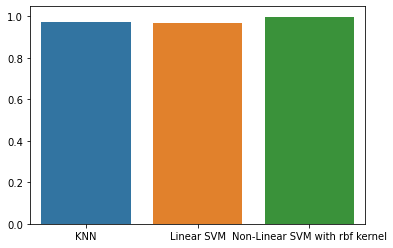

In [15]:
# Visualizing the accuracies using bar plot
names = ['KNN','Linear SVM','Non-Linear SVM with rbf kernel']
sns.barplot(x=names,y=scores)

All the three classifiers perform equally well on the dataset. Linear SVM performs the worst among the three accuracy of 96.982%. KNN with Eucledian metric gives us an accuracy of 97.545%. The best performance is given by non-linear SVM which performs exceedingly well around 99.8364% acccurately. Eventhough KNN gives good accuracy, the computing time taken by it is way larger than that taken by others, it is approximately thirty times more than non-linear svm and 300 times more than that of linear svc !!